In [219]:
shape_cat=""
vol=""
z_range=""

In [220]:
# Parameters
shape_cat = "mcal"
vol = "all"
z_range = "all_z"


In [221]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [222]:
print(len(clusters))
print(len(shapes))

12482
203070


In [223]:
# Print the numbers of galaxies that needed to be masked


print(np.sum(shapes[('All','e1')]==-9999))
print(np.sum(shapes[('All','e2')]==-9999))
print(np.sum(shapes['All','flags_select']==0))
print(np.sum(shapes[('All','PP')]<=0.55))

0
0
203070
0


In [224]:
#masking
print(len(clusters))
print(len(shapes))

12482
203070


# Stats of e1,e2

count    203070.000000
mean         -0.000320
std           0.147964
min          -0.728444
25%          -0.080939
50%          -0.000233
75%           0.080106
max           0.852003
Name: (All, e2), dtype: float64

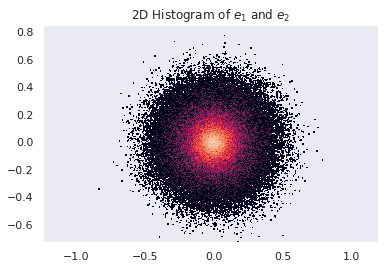

In [225]:
from matplotlib.colors import LogNorm 
plt.hist2d(shapes['All','e1'],shapes['All','e2'],bins=500,norm=LogNorm())
plt.axis('equal')
plt.title("2D Histogram of $e_1$ and $e_2$")
pd.Series(shapes['All','e1']).describe()
pd.Series(shapes['All','e2']).describe()

count    203070.000000
mean          0.668877
std         274.120513
min      -44173.333800
25%          -1.006517
50%           0.000047
75%           0.998770
max       67310.028672
dtype: float64

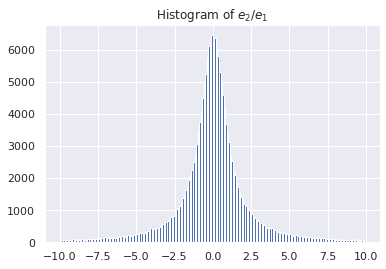

In [226]:
#statistics and hisgoram of e2/e1
plt.hist(shapes['All','e2']/shapes['All','e1'],bins=np.arange(-10,10,0.1))
plt.title("Histogram of $e_2$/$e_1$")
pd.Series(shapes['All','e2']/shapes['All','e1']).describe()

# Get phi 

In [227]:
def get_std_err_of_mean(np_array):
    mean=np_array.mean()
    std=np_array.std()
    n=len(np_array)
    return(std/np.sqrt(n))

In [228]:
phi_1d=shapes[('All','phi')]

## Stats for unweighted

In [229]:
pd.Series(phi_1d).describe()
print("Mean:{:05e} \nStdE:{:05e} ".format(phi_1d.mean(),phi_1d.std()/np.sqrt(len(phi_1d))))

Mean:4.498229e+01 
StdE:5.770844e-02 


count    203070.000000
mean         44.982286
std          26.005320
min           0.001093
25%          22.477616
50%          44.922477
75%          67.527644
max          89.999862
Name: (All, phi), dtype: float64

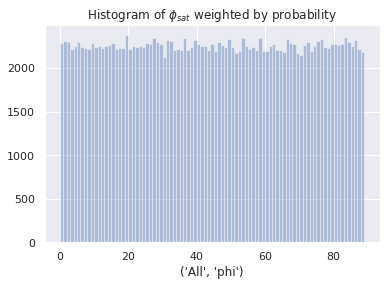

In [230]:
BINS=np.arange(0,90,1)
ax = sns.distplot(shapes[('All','phi')],bins=BINS,kde=False)
ax.set_title("Histogram of $\phi_{sat}$ weighted by probability") 
pd.Series(phi_1d).describe()

# Abnormal Analysis

In [231]:
np.sum((shapes[('All','phi')]>=22.4) &(shapes[('All','phi')]<=22.6)) 
abn_1 = shapes[(shapes[('All','phi')]>=22.4) &(shapes[('All','phi')]<=22.6)]
abn_2 = shapes[(shapes[('All','phi')]>67.4) &(shapes[('All','phi')]<=67.6)]

In [232]:
print("Number of satellites in the first spike:",len(abn_1))
print("Number of tiles in the first spike:",len(abn_1[('All','tilename')].unique()))
print("Number of clusters in the first spike:",len(abn_1[('All','MEM_MATCH_ID')].unique()))

Number of satellites in the first spike: 444
Number of tiles in the first spike: 399
Number of clusters in the first spike: 432


In [233]:
print("Number of satellites in the entire catalog:",len(shapes))
print("Number of tiles in the entire catalog:",len(shapes[('All','tilename')].unique()))
print("Number of clusters in the entire catalog:",len(shapes[('All','MEM_MATCH_ID')].unique()))

Number of satellites in the entire catalog: 203070
Number of tiles in the entire catalog: 3300
Number of clusters in the entire catalog: 12482


In [234]:
save1=abn_1[[('All','RA'),('All','DEC'),('All','tilename'),('All','MEM_MATCH_ID')]].sort_values(('All','MEM_MATCH_ID'))
save2=abn_2[[('All','RA'),('All','DEC'),('All','tilename'),('All','MEM_MATCH_ID')]].sort_values(('All','MEM_MATCH_ID'))

In [ ]:
for index,galaxy in save1.iterrows():
    print(galaxy[('All','RA')],",",galaxy[('All','DEC')])

In [236]:
corr_1=abn_1.corr(method='pearson')[('All','phi')]
corr_2=abn_2.corr(method='pearson')[('All','phi')]

In [237]:
display(HTML((pd.concat([pd.DataFrame(corr_1),pd.DataFrame(corr_2)],axis=1)).to_html()))
# display(corr_2.to_html())

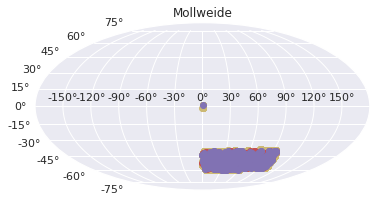

In [238]:
abn_1_Coor=SkyCoord(abn_1['All','RA'],abn_1['All','DEC'],unit=u.deg)
abn_2_Coor=SkyCoord(abn_2['All','RA'],abn_2['All','DEC'],unit=u.deg)
shape_Coor=SkyCoord(shapes['All','RA'],shapes['All','DEC'],unit=u.deg)


plt.figure()
plt.subplot(111, projection="mollweide")
plt.title("Mollweide")
plt.grid(True)
plt.scatter(shape_Coor.ra.radian, shape_Coor.dec.radian,color='y')
plt.scatter(abn_1_Coor.ra.radian, abn_1_Coor.dec.radian,color='r')
plt.scatter(abn_2_Coor.ra.radian, abn_2_Coor.dec.radian,color='m')
plt.show()

In [239]:
# np.save("/home/cz136/project/sa/data/im3_225_id.npy",abn_1.index.to_numpy())
# np.save("/home/cz136/project/sa/data/im3_675_id.npy",abn_2.index.to_numpy())
# np.save("/home/cz136/project/sa/data/im3_225_ra.npy",abn_1[('All','ra')].to_numpy())
# np.save("/home/cz136/project/sa/data/im3_225_dec.npy",abn_1[('All','dec')].to_numpy())
# np.save("/home/cz136/project/sa/data/im3_675_ra.npy",abn_2[('All','ra')].to_numpy())
# np.save("/home/cz136/project/sa/data/im3_675_dec.npy",abn_2[('All','dec')].to_numpy())

# Analysis around 22.5 and 67.5

In [240]:
#Print out the most crowded bins

phi_count=np.histogram(phi_1d,bins=BINS)
sort=np.argsort(-phi_count[0])
phi_1d_sort=np.sort(phi_1d)
print(phi_count[1][sort])
print(phi_count[0][sort])

[19 83 58 27 36 53 76 66 49 31 86 39 75  1 32  5 46  2 72 84 28  9 67 25
 15  0 40 44 26 82 80 68 29 79 62 71 14 81 47 13 42 21 41 61 54 85 11 23
  4 74 24 22 56 77  6 38 10 48 50  7 17 78 18 12 87 34 55  8 16 20  3 43
 35 64 37 63 57 33 45 73 60 52 59 65 88 51 69 70 30]
[2377 2358 2349 2348 2342 2341 2336 2330 2328 2322 2322 2320 2316 2312
 2309 2301 2301 2299 2299 2296 2294 2292 2288 2288 2285 2283 2280 2280
 2280 2279 2278 2275 2274 2274 2271 2269 2268 2266 2265 2258 2256 2254
 2254 2254 2254 2253 2252 2252 2249 2248 2247 2243 2243 2239 2238 2237
 2236 2236 2236 2234 2233 2229 2229 2226 2222 2222 2221 2217 2216 2216
 2215 2213 2207 2205 2205 2204 2204 2203 2198 2195 2195 2194 2191 2186
 2185 2177 2173 2146 2132]


count    2377.000000
mean       22.526905
std         0.306184
min        22.000621
25%        22.252429
50%        22.528576
75%        22.793950
max        23.065847
dtype: float64

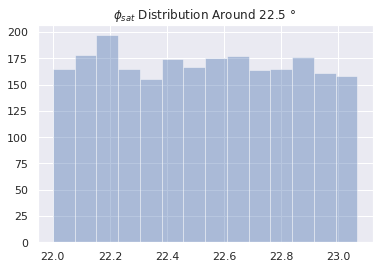

In [241]:
#Statistics around 22.5
first_cluster_left=np.sum(phi_count[0][0:22])
first_length=phi_count[0][sort][0]
first_cluster=phi_1d_sort[first_cluster_left:first_cluster_left+first_length]
ax = sns.distplot(first_cluster,kde=False)
ax.set_title("$\phi_{sat}$ Distribution Around 22.5 $\degree$")
pd.Series(first_cluster).describe()

count    2377.000000
mean       67.514924
std         0.300527
min        67.000861
25%        67.253763
50%        67.513454
75%        67.779540
max        68.039308
dtype: float64

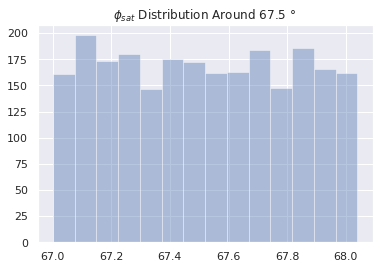

In [242]:
second_cluster_left=np.sum(phi_count[0][0:67])
second_length=phi_count[0][sort][0]
second_cluster=phi_1d_sort[second_cluster_left:second_cluster_left+second_length]
ax = sns.distplot(second_cluster,kde=False)
ax.set_title("$\phi_{sat}$ Distribution Around 67.5 $\degree$")
pd.Series(second_cluster).describe()

In [243]:
value,count=np.unique(second_cluster,return_counts=True)

In [ ]:
for i in range(len(value)):
    print(value[i],count[i])

In [245]:
test=shapes[shapes[('All','phi')]==67.5]

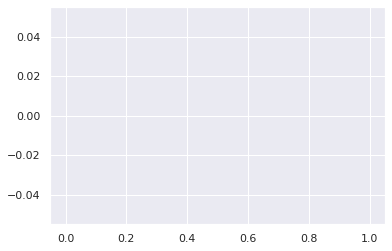

In [246]:
test[('All','e1')].hist()

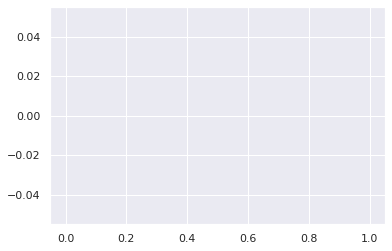

In [247]:
test[('All','e2')].hist()

In [248]:
test[('All','tilename')]

Series([], Name: (All, tilename), dtype: object)

In [ ]:
for i in range(len(count)):
    print(value[i],count[i])

# Get e

## Statistics of e1 and e2

In [250]:
e1=shapes[('All','e1')].to_numpy()
shapes[('All','e1')].describe()

count    203070.000000
mean          0.000250
std           0.147185
min          -0.838272
25%          -0.079562
50%          -0.000224
75%           0.080156
max           0.789564
Name: (All, e1), dtype: float64

In [251]:
e2=shapes[('All','e1')].to_numpy()
shapes[('All','e2')].describe()

count    203070.000000
mean         -0.000320
std           0.147964
min          -0.728444
25%          -0.080939
50%          -0.000233
75%           0.080106
max           0.852003
Name: (All, e2), dtype: float64

In [252]:
# np.save("/home/cz136/project/sa/data/{}/e_array".format(dir_string),e_list)

In [253]:
e_p_1d=shapes[('All','ep')]
e_x_1d=shapes[('All','ex')]

mean=-8.501308e-05, std_mean=3.270185e-04


count    203070.000000
mean         -0.000085
std           0.147365
min          -0.715431
25%          -0.080154
50%          -0.000257
75%           0.080390
max           0.792175
Name: (All, ep), dtype: float64

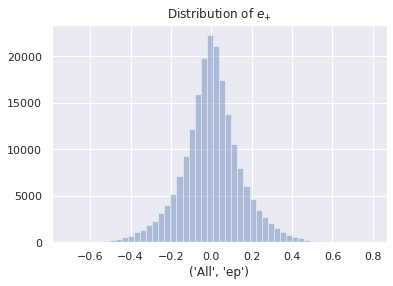

In [254]:
ax=sns.distplot(e_p_1d,kde=False)
ax.set_title("Distribution of $e_{+}$")
print ("mean={:05e}, std_mean={:05e}".format(e_p_1d.mean(),get_std_err_of_mean(e_p_1d)))
pd.Series(e_p_1d).describe()

mean=4.244760e-05, std_mean=3.279499e-04


count    203070.000000
mean          0.000042
std           0.147785
min          -0.903223
25%          -0.080243
50%          -0.000491
75%           0.079951
max           0.795489
Name: (All, ex), dtype: float64

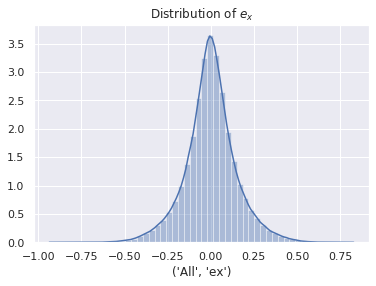

In [255]:
ax=sns.distplot(e_x_1d)
ax.set_title("Distribution of $e_{x}$")
print ("mean={:05e}, std_mean={:05e}".format(e_x_1d.mean(),get_std_err_of_mean(e_x_1d)))
pd.Series(e_x_1d).describe()

In [256]:
def get_theta_for_obj(obj1,obj2):
    ra1,dec1=(obj1[('All', 'RA')],obj1[('All', 'DEC')])
    ra2,dec2=(obj2[('All', 'RA')],obj2[('All', 'DEC')])
    
    
    
    c1=SkyCoord(ra1*u.deg,dec1*u.deg)
    c2=SkyCoord(ra2*u.deg,dec2*u.deg)
    
    
    return(90-c1.position_angle(c2).degree)

In [257]:
def get_pa_for_member(obj):
    e1=obj['All']['e1']
    e2=obj['All']['e2']
    
    α =0.5*np.arctan2(-e2,-e1)*180/np.pi
    return(α)

In [258]:
error_list_phi=[]
error_list_e=[]

def get_phi_for_member(member):
    
    """Input: cluster series
        Output: an array of position angle weighted by PP
        Record KeyError in an array (usually caused by uncomplete shape catalog).
    """
    
    try:
        cluster_id=member[('All','MEM_MATCH_ID')]
        cluster=clusters.loc[cluster_id]
        center_id=cluster[('Alt', 'Alt1', 'ID_CENT')]
        center = shapes.loc[center_id]
        
        pa=get_pa_for_member(member)
        theta= get_theta_for_obj(member,center)
        phi=(pa-theta)
    #     print(center.index)
        return(phi)    
    except KeyError as e:
        error_list_phi.append(e)
        print(e)
        return(np.nan)

In [271]:
def get_theta_for_member(member):
    
    """Input: cluster series
        Output: an array of position angle weighted by PP
        Record KeyError in an array (usually caused by uncomplete shape catalog).
    """

    cluster_id=member[('All','MEM_MATCH_ID')]
    cluster=clusters.loc[cluster_id]
    center_id=cluster[('Alt', 'Alt1', 'ID_CENT')]
    center = shapes.loc[center_id]

    theta= get_theta_for_obj(member,center)
#     print(center.index)
    return(theta)    

In [ ]:
def process_phi(phi_1d):

    phi_1d=np.where(phi_1d<=0,-phi_1d,phi_1d)
    phi_1d=np.where(phi_1d>=180,phi_1d-180,phi_1d)
    phi_1d=np.where(phi_1d>=90,180-phi_1d,phi_1d)
 
    return(phi_1d)

In [ ]:
for index,row in test.iterrows():
#     e1=row[('All','e1')]
#     e2=row[('All','e2')]
    e1=row['All']['e1']
    e2=row['All']['e2']
    α =0.5*np.arctan2(-e2,-e1)*180/np.pi
    pa=get_pa_for_member(row)
    phi=get_phi_for_member(row)
    theta=get_theta_for_member(row)
    print(e1,e2,α,pa)

In [273]:
test=get_theta_for_member(shapes)

(array([19050., 19174., 19204., 18948., 18953., 18951., 18951., 19052.,
        19190., 31597.]),
 array([-269.99776892, -233.99799203, -197.99821514, -161.99843825,
        -125.99866135,  -89.99888446,  -53.99910757,  -17.99933068,
          18.00044622,   54.00022311,   90.        ]),
 <a list of 10 Patch objects>)

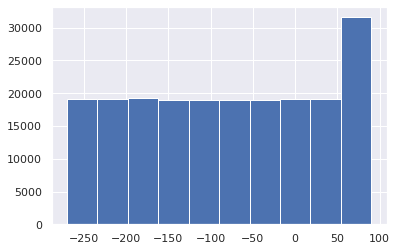

In [276]:
plt.hist(test)

count    203070.000000
mean         -5.514997
std         103.043362
min        -179.999440
25%         -90.000000
50%         -11.302713
75%          84.198233
max         179.999779
Name: (All, Theta_sat), dtype: float64

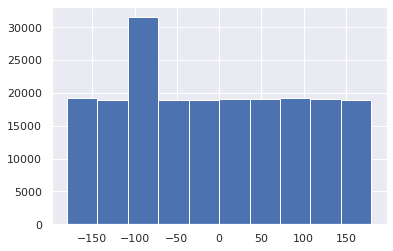

In [264]:
shapes[('All','Theta_sat')].hist()
shapes[('All','Theta_sat')].describe()

In [296]:
test1=shapes[shapes['All','Theta_cen']==90]

In [297]:
len(test1)

12486

In [298]:
len(shapes)

203070

In [294]:
corr_1=shapes.corr(method='pearson')[('All','Theta_sat')]

(-0.5426167178300081, 0.5289034450603982, -0.506223075580471, 0.6076909457602565)

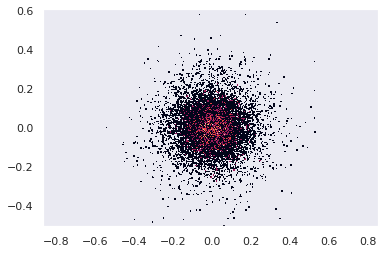

In [289]:
plt.hist2d(test1['All','e1'],test1['All','e2'],bins=500,norm=LogNorm())
plt.axis('equal')

In [295]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(corr_1)

Band  Data           
All   MEM_MATCH_ID      -0.028714
      Z                 -0.021847
      RA                 0.001735
      DEC                0.001293
      R                  0.073734
      P                 -0.072075
      PFREE              0.000491
      THETA_I           -0.007685
      THETA_R           -0.013549
      REFMAG_FIT         0.058892
      REFMAG_FIT_E       0.027009
      REFMAG             0.058892
      REFMAG_ERR         0.027009
      ZRED              -0.023545
      ZRED_E             0.032655
      ZRED2             -0.023651
      ZRED2_E            0.025764
      CHISQ             -0.029427
      EBV                     NaN
      ZSPEC             -0.014214
      ZMAG               0.058892
      ZMAG_ERR           0.027009
g     MODEL_MAG          0.032199
      MODEL_MAGERR       0.010140
r     MODEL_MAG          0.039683
      MODEL_MAGERR       0.022459
i     MODEL_MAG          0.051848
      MODEL_MAGERR       0.023320
z     MODEL_MAG          0

count    203070.000000
mean          5.247597
std         102.952608
min        -179.999425
25%         -84.580118
50%          11.190830
75%          90.000000
max         179.997873
Name: (All, Theta_cen), dtype: float64

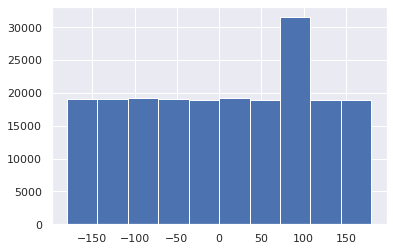

In [265]:
shapes[('All','Theta_cen')].hist()
shapes[('All','Theta_cen')].describe()

In [266]:
shapes.columns

MultiIndex([('All',    'MEM_MATCH_ID'),
            ('All',               'Z'),
            ('All',              'RA'),
            ('All',             'DEC'),
            ('All',               'R'),
            ('All',               'P'),
            ('All',           'PFREE'),
            ('All',         'THETA_I'),
            ('All',         'THETA_R'),
            ('All',      'REFMAG_FIT'),
            ...
            ('All', 'flags_select_2m'),
            ('All',              'PP'),
            ('All',       'Theta_cen'),
            ('All',       'Theta_sat'),
            ('All',            'angR'),
            ('All',             'phi'),
            ('All',              'ep'),
            ('All',              'ex'),
            ('All',          'normLR'),
            ('All',        'R_LAMBDA')],
           names=['Band', 'Data'], length=118)

In [307]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(shapes.loc[3130863376])

Band  Data           
All   MEM_MATCH_ID               5887
      Z                      0.487764
      RA                      354.647
      DEC                    -46.9969
      R                      0.366945
      P                      0.890678
      PFREE                         1
      THETA_I                       1
      THETA_R                       1
      REFMAG_FIT              19.5723
      REFMAG_FIT_E          0.0201118
      REFMAG                  19.5723
      REFMAG_ERR            0.0201118
      ZRED                   0.479806
      ZRED_E                0.0189194
      ZRED2                  0.479451
      ZRED2_E               0.0172496
      CHISQ                  0.263504
      EBV                           0
      ZSPEC                        -1
      ZMAG                    19.5723
      ZMAG_ERR              0.0201118
g     MODEL_MAG               22.3331
      MODEL_MAGERR           0.043343
r     MODEL_MAG               20.6262
      MODEL_MAGERR          